# Introduction to Raman Scattering

#### Name:

#### Total Points: --/100 pts
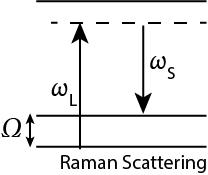
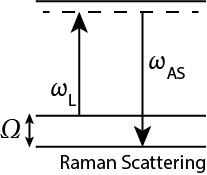
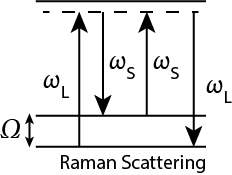

In [ ]:
### UNCOMMENT AND RUN THIS CELL IF USING GOOGLE COLAB
# !pip install ipympl -q
# from google.colab import output
# output.enable_custom_widget_manager()


Raman scattering was first observed by C.V Raman in 1928.  Raman noticed that when he illuminated certain materials with light, he observed new frequency components in the scattered light.  Some of the light was shifted to lower frequencies, called Stokes waves.  Some of the light (much less!) was shifted to higher frequencies, called anti-Stokes waves.  Raman correctly hypothesized that molecular vibrations were responsible for the frequency shift.  In modern nonlinear optics terms, the input light at $\omega$ was creating a linear polarization oscillating at $\omega$.  However, molecules vibrating at $\Omega$ were also creating a nonlinear polarization oscillating at $\Omega$, which were acting as a source for new electric fields at $\omega \pm \Omega$.

We can visualize Raman scattering using an energy level diagram:

![raman.png](https://github.com/BYUCamachoLab/nonlinear-optics/blob/main/book/images/raman.png?raw=true)

Here we have a photon from a laser at frequency $\omega_L$ being absorbed.  Then a photon at $\omega_S = \omega_L - \Omega$ is emitted, bringing the energy stored in the atom down to the ground state plus $\hbar \Omega$, which is just the energy of a phonon vibrating with frequency $\Omega$.  This means that some of the energy was used to create a photon at the stokes frequency $\omega_S = \omega_L - \Omega$, and some was used to create at phonon at frequency $\Omega$.

If the incident laser power is weak, this process only happens occasionally, and by the time a new scattering process is initiated, the atom has re-thermalized back to the ground state.  However, some electrons are always in the state with energy $\hbar \Omega$ above the ground state. How many? a factor of $\exp(-\hbar \Omega /kT)$ smaller than the ground state.  This is called the Boltzmann factor.  

![raman_AS.png](https://github.com/BYUCamachoLab/nonlinear-optics/blob/main/book/images/raman_AS.png?raw=true)

In this case, a photon is generated with frequency $\omega_{AS} = \omega_L + \Omega$.

However, if the incident laser power is high enough, then many stokes photons will be produced, and they can initiate *stimulated* scattering of additional photons at the stokes frequency.  The energy level diagram looks like this:

![raman_stimulated.png](https://github.com/BYUCamachoLab/nonlinear-optics/blob/main/book/images/raman_stimulated.png?raw=true)



What is the degeneracy factor for this process?  In other words, how many photon pathways are there?  Let's do a quick check using sympy:

In [ ]:
from sympy import * #import sympy
EL, ES = symbols('E_L, E_S')
Esq = (EL + functions.conjugate(EL) + ES + functions.conjugate(ES))**3
    
simplify(Esq.expand())

The process we are looking for is $E_L E_L^* E_S$, which has a degeneracy of 6.  We can therefore write the nonlinear polarization as

$$
\begin{align}
\tilde{P}(\omega_S) = 6\epsilon_0 \chi^{(3)}(\omega_S; \omega_L, -\omega_L, \omega_S )|\tilde{E}_L|^2 \tilde{E}_S
\end{align}
$$

As written, this is a parametric process that looks identical to the optical Kerr effect studied in the last notebook.  As such, it will only modify the refractive index a the stokes frequency, but nothing more.  However, often the process occurs near a material resonance (hence the solid horizontal lines in the energy level diagram).   In such cases, the susceptibility has a real and imaginary part to account for material absorption.   Inserting the polarization into the coupled wave equation, we get

$$
\begin{align}
\frac{\partial \tilde{E}_S}{\partial z}  &= j\frac{\omega_S}{ 2 \epsilon_0 c n_S} P_S^{(NL)}(z)  \\
&= \frac{3\omega_S}{ c n_S}  (\chi'' - j\chi')|\tilde{E}_L|^2 \tilde{E}_S 
\end{align}
$$

where $\chi'$ is the real part of the susceptibility and $\chi''$ is the imaginary part.

What is the effect of the imaginary part?  Well, consider how the polarization affects the derivative of the stokes wave ${\partial \tilde{E}_S}/{\partial z}$.  If the polarization has no imaginary part, then we have something like ${\partial \tilde{E}_S}/{\partial z} = jA\tilde{E}_S$.  The solutions to this is just sinuoidal waves that neither grow or decay.  If, however, the polarization has an imaginary part, then we have something like ${\partial \tilde{E}_S}/{\partial z} = A\tilde{E}_S$, with a solution of exponential decay or growth.

So material absorption can change a nonlinear affect from an intensity dependent refractive index to dramatic frequency conversion!

The corresponding ode for the laser field is

$$
\begin{align}
\frac{\partial \tilde{E}_L}{\partial z}  &= j\frac{\omega_L}{ 2 \epsilon_0 c n_L} P_L^{(NL)}(z)  \\
&= \frac{3\omega_L}{ c n_L}  (-\chi'' - j\chi')|\tilde{E}_S|^2 \tilde{E}_L 
\end{align}
$$

Both of these differential equations can be re-written in terms of the optical intensities instead of the fields:

$$
\begin{align}
\frac{\partial I_S}{\partial z} &= \frac{3\omega_S \chi'' I_L}{c^2\epsilon_0 n_L n_S}I_S = g_S I_S \\
\frac{\partial I_L}{\partial z} &= -\frac{3\omega_L \chi''I_S}{c^2\epsilon_0 n_L n_S}I_L  
\end{align}
$$

Notice that we have not worried about phase matching at all in this notebook.  Why?  Well, it turns out that stimulated Raman scattering is *automatically* phase-matched!  If we were to write down the phase mismatch term explicitly, we subtract the wavenumber of the resulting stokes wave from the sum of the wavenumbers in the polarization that generated that wave:

$$
\begin{align}
\Delta k = k_S - (k_L - k_L + k_S) = 0
\end{align}
$$

So owing to the double-degeneracy of the two waves, the wavenumbers perfectly cancel.  This makes it possible to have the direction of the laser beam and the stokes beam be opposite one another, a process called backward stimulated Raman scattering.

Another interesting feature of stimulated Raman scattering is that the residual energy lost because of material absorption goes into acoustic waves generated insided the crystal.  Interestingly, these waves can be *coherent* and have been proposed to do coherent imaging at small scales, similar to ultrasound but with much smaller wavelengths.  A more complete description of SRS includes the acoustic waves in addition to the electromagnetic waves.

## Exercises

1. (40 pts) Find 2 applications of stimulated Raman scattering.  Include links to a journal article for each describing the application.
2. (60 pts) In silica optical fibers, the Raman gain coefficient is about $10^{-13}$ m/W.  Starting with 8 kW of power at 1064 nm and a stokes frequency at 1116 nm,  at what distance is 90% transfered to the stokes frequency? 